In [14]:
info = {
 "title": "Christmas House",
 "author": "Alex Carney",
 "github_username": "alcarney",
 "stylo_version": "0.9.0",
 "dimensions": (1920, 1080)
}

In [1]:
import numpy as np
import numpy.random as npr
from math import pi

from stylo.domain.transform import translate
from stylo.color import FillColor
from stylo.math import lerp
from stylo.image import LayeredImage
from stylo.shape import Circle, Shape, Square, Rectangle, Ellipse, Triangle

In [2]:
black = FillColor()
ice = FillColor("00ddff")
lightgrey = FillColor("888888")
blue = FillColor("0000aa")
darkblue = FillColor("0000dd")
grey = FillColor("777777")
darkgrey = FillColor("444444")
darkred = FillColor("990000")
red = FillColor("bb0000")
lightred = FillColor("dd0000")
yellow = FillColor("ffff00")
white = FillColor("ffffff")
darkgreen = FillColor("006600")
green = FillColor("008800")
brown = FillColor("663300")
darkbrown = FillColor("441100")

In [3]:
class Upper(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale
    
    def draw(self):
        
        upper = Ellipse(y=0, a=1, b=2.5, fill=True)
        
        def curtain(x, y):
            
            x = x / self.scale
            y = y / self.scale
            
            upper_bounds = np.logical_and(y < 0, x > 0)
            return np.logical_and(upper(x=x, y=y), upper_bounds)
            
            return np.logical_or(material, mat)
            
        return curtain
    
class Lower(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale
    
    def draw(self):
        
        lower = Ellipse(x=-0.2, y=0, a=1, b=1.5, fill=True)
        
        def curtain(x, y):
            
            x = x / self.scale
            y = y / self.scale
            
            lower_bounds = np.logical_and(y > 0, x > 0)
            return np.logical_and(lower(x=x, y=y), lower_bounds)
            
        return curtain  
    
class Curtain(Shape):
    
    def __init__(self, scale=1, flip=False):
        self.scale = scale
        self.flip = flip
        
    def draw(self):
        
        upper = Upper()
        lower = Lower()
        
        def curtain(x, y):
            x = x / self.scale
            y = y / self.scale
            
            if self.flip:
                x = -x
            
            return np.logical_or(upper(x=x, y=(y - 0.5)), lower(x=x, y=(y + 1.4)))
        
        return curtain
            

In [4]:
class Curtains(Shape):
    
    def __init__(self, scale=1, dx=1):
        self.scale = scale
        self.dx = dx
        
    def draw(self):
        
        left = Curtain()
        right = Curtain(flip=True)
        
        def curtains(x, y):
            x = x / self.scale
            y = y / self.scale
            
            shape = left(x=(x + self.dx/2), y=y)
            return np.logical_or(shape, right(x=(x - self.dx), y=y))
            
        return curtains
    
class Frame(Shape):
    
    def draw(self):
        
        outer = Rectangle(x=0.05, y=-0.1, width=0.35, height=0.45)
        inner = Rectangle(x=0.05, y=-0.1, width=0.3, height=0.4)
        
        def frame(x, y):
            
            out = outer(x=x, y=y)
            bounds = np.logical_or(np.abs(x - 0.05) < 0.02, np.abs(y + 0.1) < 0.02)
            bounds = np.logical_and(out, bounds)
            
            mask = np.logical_not(inner(x=x, y=y))
            outline = np.logical_and(out, mask)
            
            return np.logical_or(bounds, outline)
            
        return frame

class Path(Shape):
    
    def draw(self):
        
        def path(x, y):
            s1 = np.sin(y*12)
            p = np.logical_and(4*x < s1 + 0.1, 4*x > s1 - 1.25)            
            
            return np.logical_and(p, y < -0.4)
            
        return path
    
class Grass(Shape):
    
    def draw(self):
        
        def grass(x, y):
            return y < -0.4

        return grass
    
class Pattern(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale
        
    def draw(self):
        
        def pattern(x):
            x = x / self.scale
            return np.abs(x % 0.1) < 0.01
            
        return pattern
    
class Roof2(Shape):
    
    def __init__(self, pattern=False):
        self.pattern = pattern
    
    def draw(self):
        
        roof2 = Triangle((-0.625, 0), (0.625, 0), (0, 0.7)) >> translate(-1.35, 0.25)
        roof_join = Rectangle(x=0, y=0, width=1.15, height=0.75) >> translate(-0.78, 0.58)
        pattern = Pattern()
        
        def roof(x, y):
            r1 = roof2(x=(x + 1.35), y=(y - 0.25))
            r2 = roof_join(x=(x + 0.78), y=(y - 0.58))
            shape = np.logical_or(r1, r2)
            
            if not self.pattern:
                return shape
            
            rx = np.cos(pi/5)*x - np.sin(pi/4)*y
            pat = np.logical_not(pattern(x=rx))
        
            return np.logical_and(shape, pat)
        
        return roof
    
class RoofSnow(Shape):
    
    def __init__(self, roof):
        self.roof = roof
        
    def draw(self):
        
        def snow(x, y):
            shape = self.roof(x=x, y=y)
            snow = y*2 > 0.5 + np.cos((x + pi/4)*pi/2)
            
            return np.logical_and(shape, snow)
            
        return snow
    
class Roof(Shape):
    
    def __init__(self, pattern=False):
        self.pattern = pattern
    
    def draw(self):
        

        inner = Triangle((-0.65, 0), (0.65, 0), (0, 0.65))
        pattern = Pattern()
        
        def roof(x, y):
            
            ys = y - 0.5

            rx = np.cos(pi/2)*x - np.sin(pi/2)*y            
            pat = np.logical_not(pattern(x=rx))
            pat = np.logical_and(inner(x=x, y=ys), pat)
            
            return pat
            
        
        return roof
    
class GarageDoor(Shape):
    
    def __init__(self, pattern=False):
        self.pattern = pattern
    
    def draw(self):
        
        garage_door = Square(x=-1.45, y=-0.6, size=0.8)
        pattern = Pattern()
        
        def door(x, y):
            shape = garage_door(x=x, y=y)
            
            if not self.pattern:
                return shape
            
            rx = np.cos(pi/2)*x - np.sin(pi/2)*y            
            pat = np.logical_not(pattern(x=rx))
            return np.logical_and(shape, pat)
        
        return door

In [5]:
class Drive(Shape):
    
    def draw(self):
        
        def drive(x, y):
            return np.logical_and(y < -0.4, np.abs(x - y + 0.45) < 0.4)
        
        return drive
    
class Icicles(Shape):
    
    def __init__(self, slope=0, scale=1, a=0, b=1):
        self.slope = slope
        self.scale = scale
        self.a = a
        self.b = b
    
    def draw(self):
        
        def icicle(x, y):
            
            x = x / self.scale
            y = y / self.scale
            
            s1 = 0.4*np.sin(pi*x*7)
            s3 = 0.3*np.sin(pi*x*12)
            
            bounds = np.logical_and(x > self.a, x < self.b)
            ice = y > 1 + (x*self.slope) - s1 - s3
            ice = np.logical_and(ice, y < (x*self.slope) + 1.4)
            
            return np.logical_and(ice, bounds)
        
        return icicle
    
class Star(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale
    
    def draw(self):
        
        t1 = Triangle((0.5, 0), (-0.5, 0), (0, 0.75))
        t2 = Triangle((0.5, 0.5), (-0.5, 0.5), (0, -0.25))
        
        def star(x, y):
            
            x = x / self.scale
            y = y / self.scale
            
            return np.logical_or(t1(x=x, y=y), t2(x=x, y=y))
            
        return star

In [6]:
house = Square(x=0, y=-0.25, size=1.5)

garage = Square(x=-1.35, y=-0.375, size=1.25)
garage_door_bg = GarageDoor()
garage_door = GarageDoor(pattern=True)
drive = Drive()

front_door = Rectangle(x=0, y=-0.7, width=0.3, height=0.6)
door_inset = Square(x=0, y=-0.55, size=0.2)
door_inset2 = Rectangle(x=0, y=-0.85, width=0.2, height=0.25)

window1 = Rectangle(x=0.05, y=-0.1, width=0.35, height=0.45) >> translate(-0.5, 0.25)
frame1 = Frame() >> translate(-0.5, 0.25)
curtain1 = Curtains(scale=0.23) >> translate(-0.5, 0.25)

window2 = Rectangle(x=0.05, y=-0.1, width=0.35, height=0.45) >> translate(0.4, 0.25)
frame2 = Frame() >> translate(0.4, 0.25)
curtain2 = Curtains(scale=0.23) >> translate(0.4, 0.25)

window3 = Rectangle(x=0.05, y=-0.1, width=0.35, height=0.45) >> translate(-0.5, -0.5)
frame3 = Frame() >> translate(-0.5, -0.5)

window4 = Rectangle(x=0.05, y=-0.1, width=0.35, height=0.45) >> translate(0.4, -0.5)
frame4 = Frame() >> translate(0.4, -0.5)


roof_cover = Triangle((-0.75, 0), (0.75, 0), (0, 0.75)) >> translate(0, 0.5)
roof_bg = Roof()
roof = Roof(pattern=True)
roof2_bg = Roof2()
roof2 = Roof2(pattern=True)

roof_snow = RoofSnow(roof2_bg)
icicle = Icicles(slope=1, scale=0.25, b=2.65) >> translate(-0.65, 0.15)
icicle2 = Icicles(slope=-1, scale=0.25, b=2.7) >> translate(0, 0.815)
icicle3 = Icicles(scale=0.25, b=4.9) >> translate(-1.975, -0.1)

moon = Circle(x=2, y=1, r=0.4, fill=True)

path = Path()
grass = Grass()

snow_path = Ellipse(x=1.75, y=-1, a=1.5, b= 0.5, pt=0.07, r=0.45)
snow_path2 = Ellipse(x=-0.8, y=-1.4, a=1.5, b=0.5, pt=0.03, r=0.25)

snowman_base_o = Circle(x=1.1, y=-0.9, r=0.2, fill=True)
snowman_base = Circle(x=1.1, y=-0.9, r=0.19, fill=True)
snowman_mid_o = Circle(x=1.1, y=-0.7, r=0.15, fill=True)
snowman_mid = Circle(x=1.1, y=-0.7, r=0.14, fill=True)
snowman_o = Circle(x=-0.75, y=-1.2, r=0.11, fill=True)
snowman = Circle(x=-0.75, y=-1.2, r=0.1, fill=True)

wreath = Circle(r=0.08, pt=0.003) >> translate(0, -0.55)
dy = -0.625
wreath_garnish = Triangle((-0.05, 0.025 + dy), (-0.05, dy - 0.025), (0, dy)) |\
                 Triangle((0.05, dy + 0.025), (0.05, dy -0.025), (0, dy))

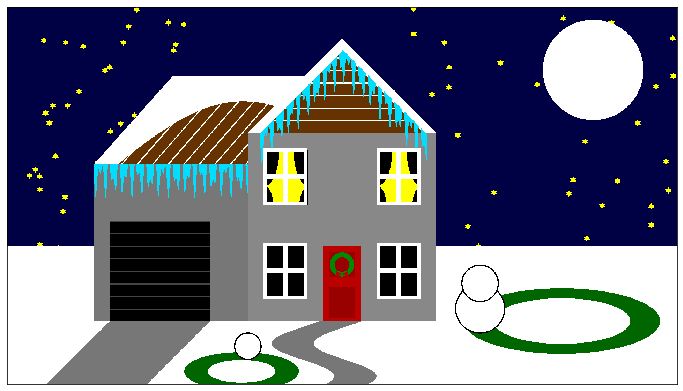

In [12]:
image = LayeredImage(background="000044", scale = 3)

npr.seed(128)
xs = lerp(0, 3)
ys = lerp(-0.5, 1.5)
xs2 = lerp(-1, -2.5)

for s1, t1, s2, t2 in npr.rand(50, 4):
    star = Star(scale=0.05) >> translate(xs(s1), ys(t1))
    star2 = Star(scale=0.05) >> translate(xs2(s2), ys(t2))
    
    image.add_layer(star, yellow)
    image.add_layer(star2, yellow)

image.add_layer(roof2_bg, white)
image.add_layer(roof2, brown)
image.add_layer(roof_snow, white)


image.add_layer(roof_cover, white)
image.add_layer(roof_bg, brown)
image.add_layer(roof, brown)

image.add_layer(grass, white)
image.add_layer(path, grey)
image.add_layer(drive, grey)

image.add_layer(garage, grey)
image.add_layer(garage_door_bg, darkgrey)
image.add_layer(garage_door, black)

image.add_layer(house, lightgrey)


image.add_layer(icicle, ice)
image.add_layer(icicle2, ice)
image.add_layer(icicle3, ice)


image.add_layer(front_door, red)
image.add_layer(door_inset, darkred)
image.add_layer(door_inset2, darkred)
image.add_layer(wreath, green)
image.add_layer(wreath_garnish, red)

image.add_layer(window1, yellow)
image.add_layer(curtain1, black)
image.add_layer(frame1, white)

image.add_layer(window2, yellow)
image.add_layer(curtain2, black)
image.add_layer(frame2, white)

image.add_layer(window3, black)
image.add_layer(frame3, white)

image.add_layer(window4, black)
image.add_layer(frame4, white)

image.add_layer(moon, white)

image.add_layer(snow_path, darkgreen)
image.add_layer(snow_path2, darkgreen)

image.add_layer(snowman_base_o, black)
image.add_layer(snowman_base, white)
image.add_layer(snowman_mid_o, black)
image.add_layer(snowman_mid, white)
image.add_layer(snowman_o, black)
image.add_layer(snowman, white)